In [ ]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [ ]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898


from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [ ]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

from maze_env import Maze
from utils import plot_policy, plot_values, test_agent

In [ ]:
# intialize the environment
env = Maze()

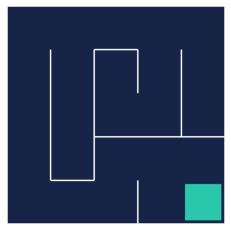

In [ ]:
# plot maze
frame = env.render(mode="rgb_array")
plt.axis('off')
plt.imshow(frame)

In [ ]:
print(f"observation space {env.observation_space.nvec}")
print(f"action space {env.action_space.n}")

observation space [5 5]
action space 4


In [ ]:
# define agent policy
# 25 states with four possible action with equal probability
policy_probs = np.full((5,5,4),0.25)  

In [ ]:
# get next action probs based on current state
def policy(state):
    return policy_probs[state]

In [ ]:
action_probabilites = policy((0,0))
for action, prob in zip(range(4),action_probabilites):
    print(f"Probability  of taking Action {action} : {prob}")

Probability  of taking Action 0 : 0.25
Probability  of taking Action 1 : 0.25
Probability  of taking Action 2 : 0.25
Probability  of taking Action 3 : 0.25


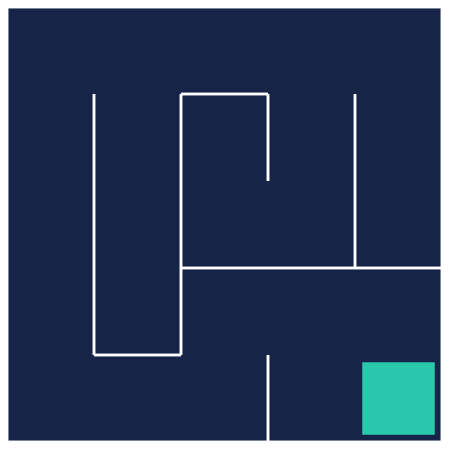

In [ ]:
 # Agent follows random policy
 test_agent(env,policy, episodes=1)

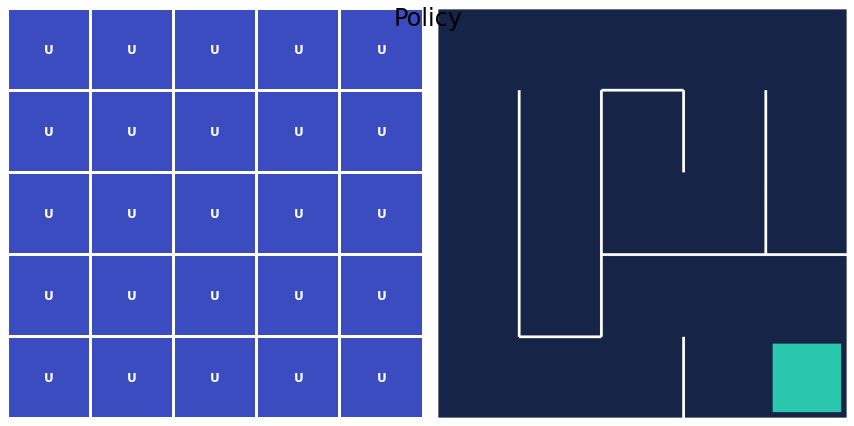

In [ ]:
# plot policy
plot_policy(policy_probs,frame)

In [ ]:
# intialize state value vector
state_values = np.zeros(shape=(5,5))

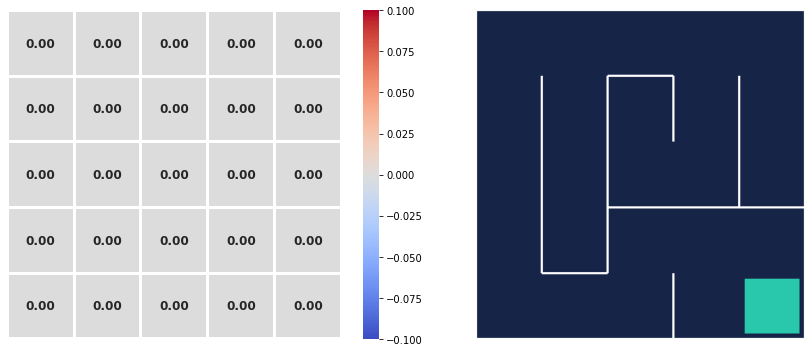

In [ ]:
plot_values(state_values, frame)

# Value Iteration Algoritm

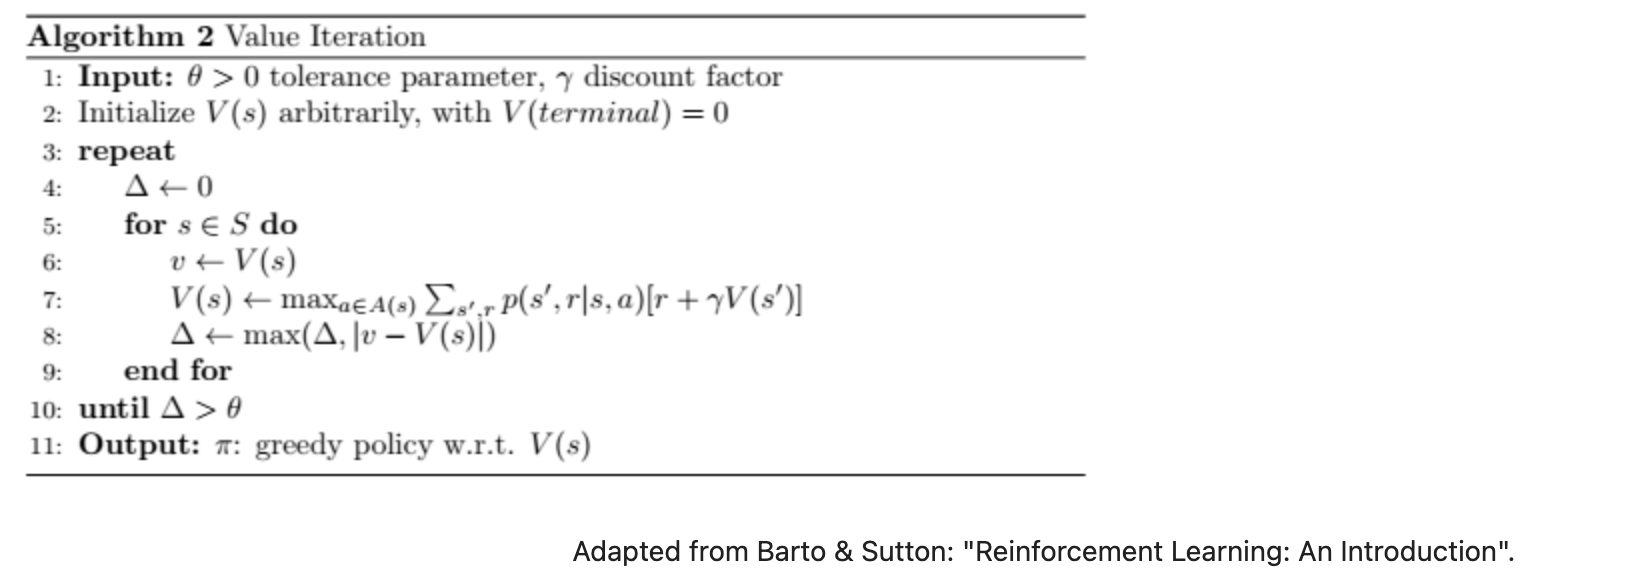

In [ ]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.9):
    delta = float("inf")

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row,col)]
                action_probs = None
                max_qsa = float("-inf")

                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row,col),action)
                    qsa = reward + gamma * state_values[next_state]

                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.0
                
                state_values[(row,col)] = max_qsa
                policy_probs[(row,col)] = action_probs

                delta = max(delta,abs(old_value-max_qsa))

In [ ]:
value_iteration(policy_probs, state_values)

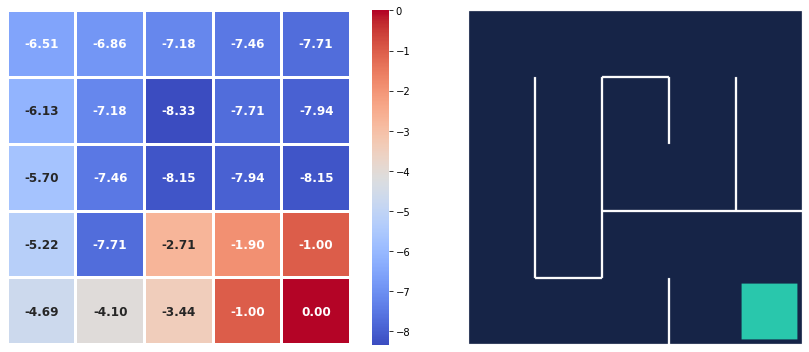

In [ ]:
plot_values(state_values, frame)

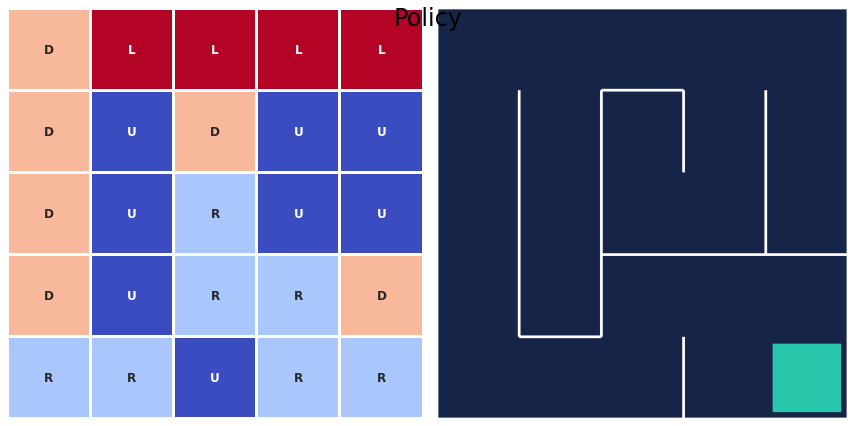

In [ ]:
plot_policy(policy_probs,frame)

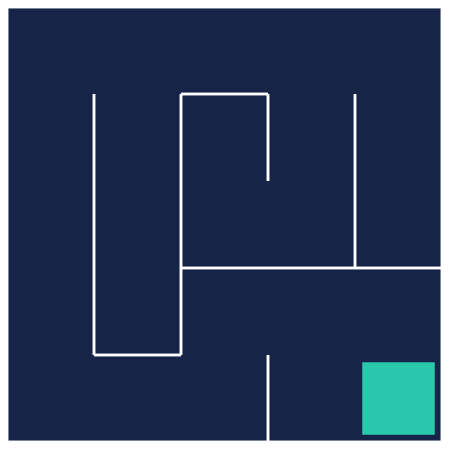

In [ ]:
test_agent(env,policy, episodes=1)